In [78]:
# images are basically represented as 3 channels.
# rhere are two types of images. 
# grayscale images and color images.
# grayscale images has 2 channels, (image height,  image width, number of channels(1))
# Color images has 3 channels, (image height, image width, 3 channels)
# Neural Network takes images in batch, that is it has 4 tnsors, (batchs size, image height, iamge width, number of channels)


In [1]:
import skimage

In [4]:
from skimage import data
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
bird = mpimg.imread("/home/prajin/Desktop/Pyotrch/Image Classification /datasets/images/bird.jpeg")

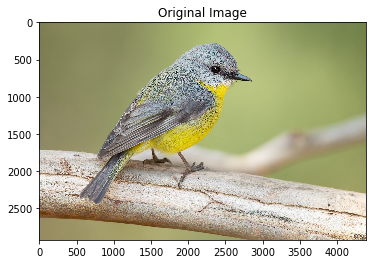

In [7]:
plt.title('Original Image')
plt.imshow(bird)

In [8]:
bird.shape

(2924, 4386, 3)

In [10]:
bird_reshape = bird.reshape(bird.shape[0], -1)
bird_reshape.shape

(2924, 13158)

In [11]:
# viewting the reshaped image

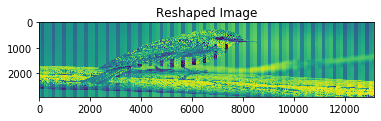

In [12]:
plt.figure(figsize=(6,6))
plt.title("Reshaped Image")
plt.imshow(bird_reshape)

In [13]:
# transforming using skimage

In [14]:
bird_resized = skimage.transform.resize(bird, (500, 500))
bird_resized.shape

(500, 500, 3)

In [15]:
# viewwing

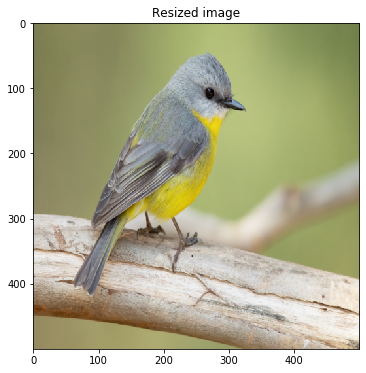

In [16]:
plt.figure(figsize=(6,6))
plt.title("Resized image")
plt.imshow(bird_resized)

In [17]:
# it is istorted, becuase we did not preserve the aspect ratio of th image.

# aspect ratio - width of image / height of image

In [21]:
aspect_ratio_original = bird.shape[1] / float(bird.shape[0])
aspect_ratio_resized = bird_resized.shape[1] / float(bird_resized.shape[0])

print("Aspect ratio of original iamge :", aspect_ratio_original)
print("Aspect ratio of  resized image:", aspect_ratio_resized)

Aspect ratio of original iamge : 1.5
Aspect ratio of  resized image: 1.0


In [22]:
# lets reshace once more preserving the aspect  ratio

In [24]:
bird_rescaled = skimage.transform.rescale(bird_resized, (1.0, aspect_ratio_original))

/home/prajin/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


In [25]:
bird_rescaled.shape

(500, 750, 3)

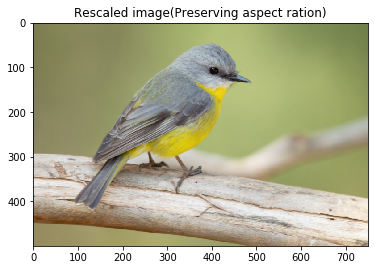

In [26]:
plt.figure(figsize=(6,6))
plt.title("Rescaled image(Preserving aspect ration)")
plt.imshow(bird_rescaled)

In [27]:
# matrix opoeation

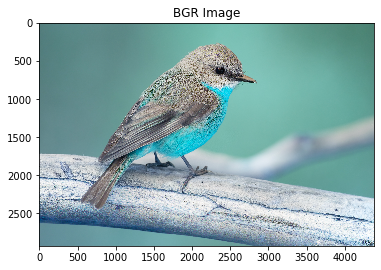

In [30]:
# switching from RGB to BGR
bird_BGR = bird[:,:, (2,1,0)]
plt.figure(figsize=(6,6))
plt.title("BGR Image")
plt.imshow(bird_BGR)

In [32]:
bird_BGR.shape # the shape is same, we just flipped.

(2924, 4386, 3)

In [33]:
# conversion from rgb to gray scale

In [34]:
bird_gray = skimage.color.rgb2gray(bird)

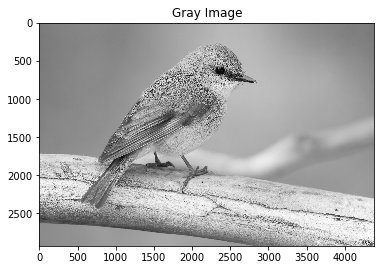

In [35]:
plt.figure(figsize=(6,6))
plt.title("Gray Image")
plt.imshow(bird_gray, cmap ='gray')

In [36]:
bird_gray.shape

(2924, 4386)

In [37]:
# reading iamge 

In [44]:
giraffes = skimage.img_as_float(skimage.io.imread('/home/prajin/Desktop/Pyotrch/Image Classification /datasets/images/girraffes.jpg'))

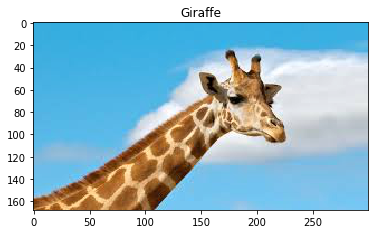

In [45]:
plt.figure(figsize=(6,6))
plt.title("Giraffe")
plt.imshow(giraffes)

In [47]:
giraffes.shape # color image

(168, 300, 3)

In [48]:
# cropping an image

In [54]:
def crop(image, cropx, cropy):
    y,x,c = image.shape
    
    startx = x//2 - (cropx //  4)
    starty = y //3 - (cropy // 4)
    
    stopx = startx + cropx
    stopy = starty + 2*cropy
    
    return image[starty:stopy, startx:stopx]

In [55]:
giraffes_cropped = crop(giraffes, 256, 256)

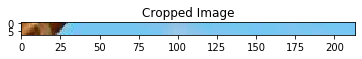

In [56]:
plt.figure(figsize=(6,6))
plt.title("Cropped Image")
plt.imshow(giraffes_cropped)

In [61]:
# Noise Filtering

# first lets add some noise

In [62]:
from skimage.util import random_noise

In [63]:
sigma = 0.155
noisy_giraffes = random_noise(giraffes, var = sigma**2)

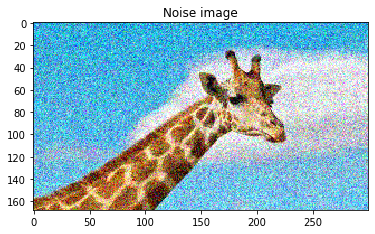

In [64]:
plt.figure(figsize=(6,6))
plt.title("Noise image")
plt.imshow(noisy_giraffes)

In [65]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

In [66]:
sigma_est = estimate_sigma(noisy_giraffes,
                          multichannel=True,
                          average_sigmas=True)

In [68]:
sigma_est # very close to the actual vlaue we used 0.0155

0.14010672944157154

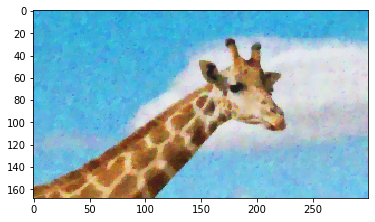

In [69]:
plt.imshow(denoise_tv_chambolle(noisy_giraffes, weight=0.1, multichannel=True))

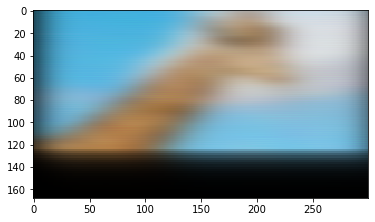

In [70]:
plt.imshow(denoise_bilateral(noisy_giraffes,
                            sigma_color=0.05, 
                            sigma_spatial =15,
                            multichannel=True))

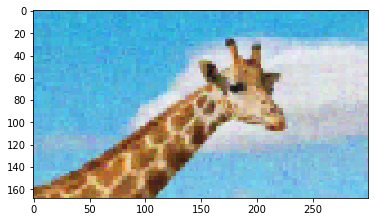

In [71]:
plt.imshow(denoise_wavelet(noisy_giraffes, multichannel=True))

In [73]:
monkeys = skimage.img_as_float(skimage.io.imread('/home/prajin/Desktop/Pyotrch/Image Classification /datasets/images/monkeys.jpg'))

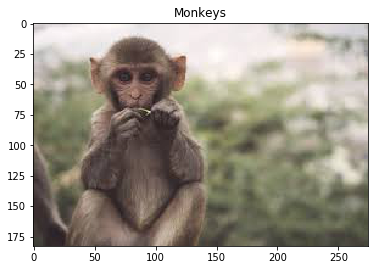

In [74]:
plt.figure(figsize=(6,6))
plt.title("Monkeys")
plt.imshow(monkeys)


In [75]:
# flipping images randomly


In [76]:
monkeys_flip = np.fliplr(monkeys)

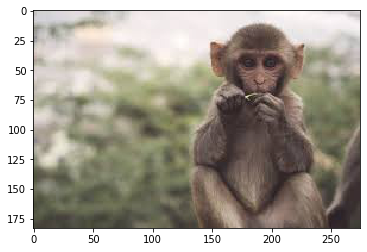

In [77]:
plt.imshow(monkeys_flip)